<a href="https://colab.research.google.com/github/danhorsley/danhorsley-DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/nobel_prize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving nobel_prize_by_winner.csv to nobel_prize_by_winner.csv


In [0]:
import pandas as pd
import numpy as np
nobel_prize = pd.read_csv('nobel_prize_by_winner.csv', encoding = "ISO-8859-1")

In [0]:
#lots and lots of data cleaning - changing to date time - missing years - changing archaic country names etc etc
nobel_prize['died'] = nobel_prize['died'].str.replace('0000-00-00','4/2/2019')
nobel_prize = nobel_prize[nobel_prize['born'] != '0000/00/00']
nobel_prize['year'] = nobel_prize['year'].astype(int).astype(str)
nobel_prize.at[ 506,'born'] = '1/1/1943'
nobel_prize.at[ 945,'born'] = '1/1/1898'
nobel_prize['born'] = pd.to_datetime(nobel_prize['born'], infer_datetime_format=True)
nobel_prize['died'] = pd.to_datetime(nobel_prize['died'], infer_datetime_format=True)
nobel_prize['year'] = pd.to_datetime(nobel_prize['year'], format='%Y')
nobel_prize['surname'] = nobel_prize['surname'].fillna('')
nobel_prize['full_name'] =nobel_prize[['firstname', 'surname']].apply(lambda x: ' '.join(x), axis=1)

In [6]:
nobel_prize.head(3)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,full_name
0,846,Elinor,Ostrom,1933-08-07,2012-06-12,USA,US,"Los Angeles, CA",USA,US,...,female,2009-01-01,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA,Elinor Ostrom
1,846,Elinor,Ostrom,1933-08-07,2012-06-12,USA,US,"Los Angeles, CA",USA,US,...,female,2009-01-01,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA,Elinor Ostrom
2,783,Wangari Muta,Maathai,1940-04-01,2011-09-25,Kenya,KE,Nyeri,Kenya,KE,...,female,2004-01-01,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN,Wangari Muta Maathai


In [16]:
nobel_prize['bornCountryCode'].isna().sum(), nobel_prize['country'].isna().sum()

(0, 251)

In [0]:
nobel_prize[nobel_prize['bornCountryCode'].isna()]

In [0]:
nobel_prize['bornCountry'] = nobel_prize['bornCountry'].replace(np.nan,'International Organization')
nobel_prize['bornCountryCode'] = nobel_prize['bornCountryCode'].replace(np.nan,'IO')

In [0]:
#binning times and makign a crosstab - but there were too many old country names so we had to use regex to clean it up
win_time_bin = pd.cut(nobel_prize['year'], 10) 

In [0]:
pd.crosstab(nobel_prize['bornCountry'], win_time_bin).head()

In [0]:
#list of all the archaic names
nobel_prize[nobel_prize['bornCountry'].str.contains("\(\now ")]

In [80]:
import re
#testing re to make sure it works on one example
test_str = 'British India (now Bangladesh)'

re.sub(r'([\sA-Za-z0-9-]+\s\(\w+\s)([A-Za-z]+)',r'\2',test_str).strip(')')

'Bangladesh'

In [0]:
#making new column with cleansed country names
cleanlist = []
clist = list(nobel_prize['bornCountry']) 
for country in clist:
  aaa = re.sub(r'([\sA-Za-z0-9-]+\s\(\w+\s)([A-Za-z]+)',r'\2',country).strip(')')
  cleanlist.append(aaa)
  

  #W&uuml;Germany #Faroe Islands (Denmark
nobel_prize['country of birth']=cleanlist
nobel_prize['country of birth'] = nobel_prize['country of birth'].str.replace('W&uuml;Germany','Germany')
nobel_prize['country of birth'] = nobel_prize['country of birth'].str.replace('Faroe Islands \(\Denmark','Denmark')
top_winners = list(nobel_prize['country of birth'].value_counts().head(5).index)
  

In [0]:
#makign a column just of the year of win
nobel_prize['year of win'] =nobel_prize['year'].dt.year

In [104]:
#makign cross tab of country vs year bin
nobel_top = nobel_prize[nobel_prize['country of birth'].isin(top_winners)]
win_time_bin_top = pd.cut(nobel_top['year of win'], 10,precision=0) 
nobel_ct = pd.crosstab(nobel_top['country of birth'], win_time_bin_top).head()
nobel_ct

year of win,"(1901.0, 1912.0]","(1912.0, 1924.0]","(1924.0, 1935.0]","(1935.0, 1947.0]","(1947.0, 1958.0]","(1958.0, 1969.0]","(1969.0, 1981.0]","(1981.0, 1992.0]","(1992.0, 2004.0]","(2004.0, 2015.0]"
country of birth,,,,,,,,,,
France,12,5,8,1,5,7,5,5,0,7
Germany,11,7,15,6,9,8,8,14,4,7
Russia,3,0,1,1,9,2,7,2,2,4
USA,2,3,13,16,22,23,39,35,55,65
United Kingdom,3,5,10,4,12,8,15,5,11,10


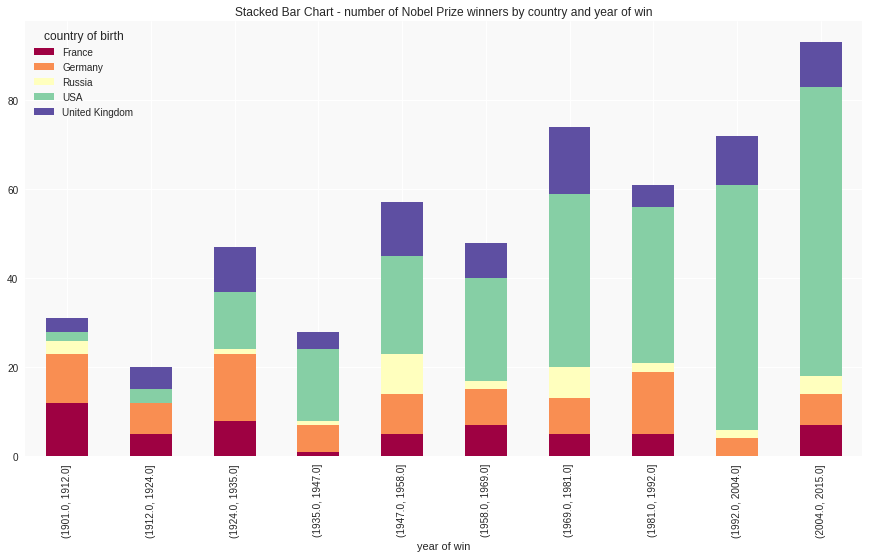

In [129]:
#making stacked bar chart of winners by country and year bin of win
import seaborn as sns
sns.set()
ax = nobel_ct.T.plot(kind='bar', stacked=True, colormap = 'Spectral')
ax.figure.set_size_inches(15, 8)
ax.set(facecolor='#f9f9f9')
ax.set_title('Stacked Bar Chart - number of Nobel Prize winners by country and year of win');



In [137]:
#now making new plot of subject vs country to see which countries are good in which areas - also expanding number of countries to top 20
top_winners20 = list(nobel_prize['country of birth'].value_counts().head(20).index)
nobel_top20 = nobel_prize[nobel_prize['country of birth'].isin(top_winners20)]
ct_subject = pd.crosstab(nobel_top20['country of birth'], nobel_top20['category'])

ct_subject.head()

category,chemistry,economics,literature,medicine,peace,physics
country of birth,,,,,,
Australia,1,0,0,8,0,2
Austria,7,1,1,6,1,3
Canada,4,3,2,4,1,4
China,1,0,2,2,1,6
Denmark,1,0,4,4,1,2


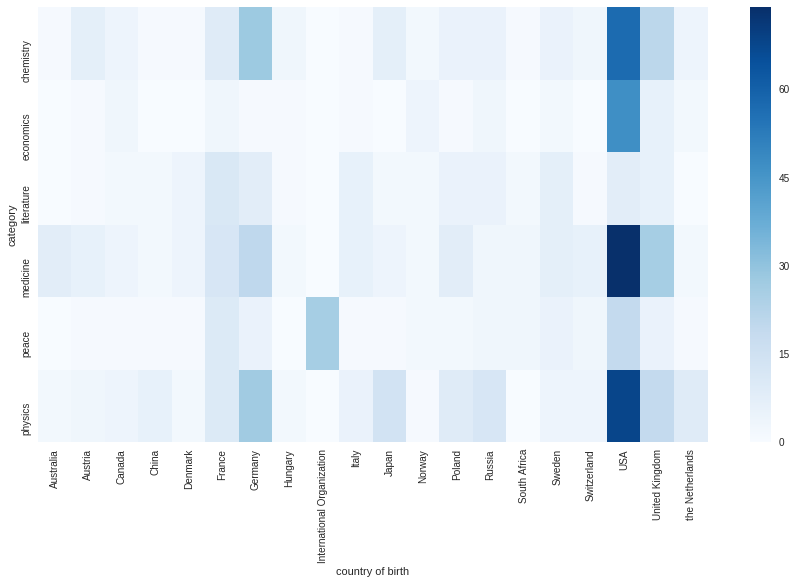

In [140]:
ax_subject = sns.heatmap(ct_subject.T,cmap='Blues')
ax_subject.figure.set_size_inches(15, 8)

In [0]:
#now we will adjust for population to see who has the most outsized contribution

df_pop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')

df_pop = df_pop.rename(columns = {'Country Name':'country of birth'})
#df_pop.groupby('Country Name')['Value'].head()
df_pop = df_pop.set_index('country of birth')
#df_pop.T.mean().head()
#df_pop.agg("mean", axis="columns")
pop_average = df_pop.groupby(level=0).mean()
pop_average = pop_average.drop(['Year'], axis=1)
pop_average.index = pop_average.index.str.replace('United States','USA')
pop_average.index = pop_average.index.str.replace('Netherlands','the Netherlands')

In [0]:
list(pop_average.index)

In [0]:
merged = pd.merge(ct_subject, pop_average, left_index=True, right_index=True, how='inner')

In [194]:
merged.head()

,chemistry,economics,literature,medicine,peace,physics,Value
country of birth,,,,,,,
Australia,1,0,0,8,0,2,1.668664e+07
Austria,7,1,1,6,1,3,7.792513e+06
Canada,4,3,2,4,1,4,2.705982e+07
China,1,0,2,2,1,6,1.071848e+09
Denmark,1,0,4,4,1,2,5.172882e+06


In [198]:
#divide by average population and multiply by 1 million
subject_adjusted_for_pop = merged.div(merged.Value,axis=0)*1000000
subject_adjusted_for_pop = subject_adjusted_for_pop.drop(['Value'], axis=1)
subject_adjusted_for_pop.head(3)

,chemistry,economics,literature,medicine,peace,physics
country of birth,,,,,,
Australia,0.059928,0.000000,0.000000,0.479425,0.000000,0.119856
Austria,0.898298,0.128328,0.128328,0.769970,0.128328,0.384985
Canada,0.147821,0.110866,0.073910,0.147821,0.036955,0.147821


Text(0.5, 1.0, 'Nobel Prize Winners by category per million population')

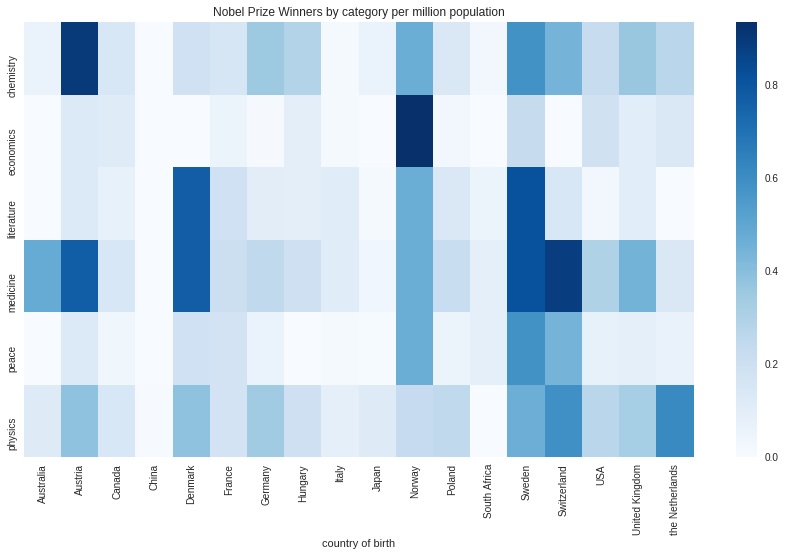

In [199]:
ax_subject_adj = sns.heatmap(subject_adjusted_for_pop.T,cmap='Blues')
ax_subject_adj.figure.set_size_inches(15, 8)
ax_subject_adj.set_title('Nobel Prize Winners by category per million population')

In [0]:
#conclusions - pound for pound austria is the chemistry boss, norway leads in economics, sweden and denmark seem to produce good novels (bias here from the academy?)
#austria,switzerland and denmark are helping us live longer, peace is more evenly distributed as is physics